<a href="https://colab.research.google.com/github/juanacuna18/IA_20242/blob/main/Taller_regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Admission_Predict_Ver1_1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Segmentar los datos en 2 grupos mediante una etiqueta, Se hizo una prueba con 0.5 y la mediana 0.7

In [ ]:
Targets_50     = np.where(df['Chance of Admit ']>= 0.5, 1,0)
Targets_median = np.where(df['Chance of Admit ']>= df['Chance of Admit '].median(), 1, 0)

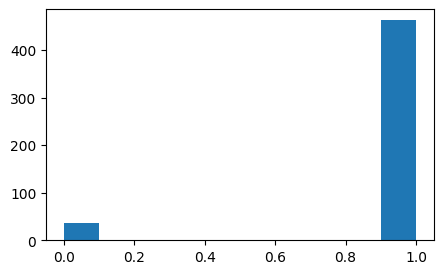

In [ ]:
plt.figure(figsize=(5,3))
plt.hist(Targets_50)
plt.show()

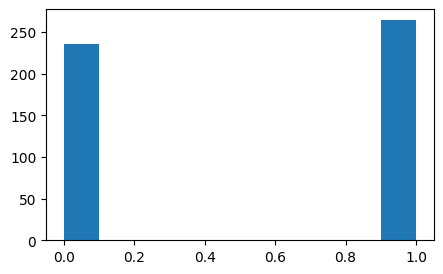

In [ ]:
plt.figure(figsize=(5,3))
plt.hist(Targets_median)
plt.show()

Matriz de correlacion


<Axes: >

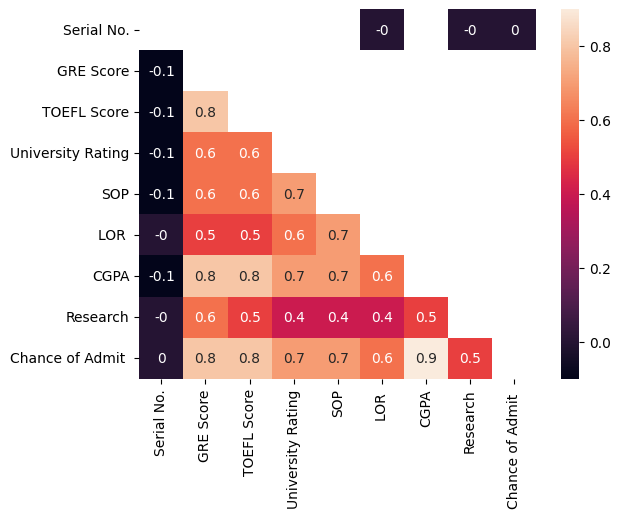

In [ ]:
matriz_correlacion = df.corr().round(1)
mask = np.triu(matriz_correlacion)
sns.heatmap(matriz_correlacion, mask=mask,annot=True)

Eliminar las caracteristicas con una correlacion mayor o igual a un umbral

In [ ]:
import numpy as np
threshold = 0.7
corr_matrix = df.corr()
upper_tri = np.triu(np.abs(corr_matrix), k=1)
valid_cols = upper_tri.max(axis=0) <= threshold #Mantiene las caracterisirtcsas cuya todos sus elementos de la columna son menor al umbral
valid_cols

array([ True,  True, False,  True, False,  True, False,  True, False])

#Crear Nueva columna al dataset

In [ ]:
df['Labels'] = Targets_median

#Eliminar columna

In [ ]:
df = df.drop(['Chance of Admit '], axis=1)

Crear nuevo dataset con las features para el modelo

In [ ]:
features = pd.DataFrame(df, columns=['Serial No.','GRE Score','University Rating','LOR ','Research'])
#features = pd.DataFrame(df, columns=['Serial No.','GRE Score','Research'])
features.head()

,Serial No.,GRE Score,University Rating,LOR,Research
0,1,337,4,4.5,1
1,2,324,4,4.5,1
2,3,316,3,3.5,1
3,4,322,3,2.5,1
4,5,314,2,3.0,0


#Normalizar las features

In [ ]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler().fit(features)
features_N = scale.transform(features)
print(features_N)

[[-1.72859016  1.81923762  0.77558214  1.09894429  0.88640526]
 [-1.72166195  0.66714832  0.77558214  1.09894429  0.88640526]
 [-1.71473373 -0.0418297  -0.09979274  0.01730621  0.88640526]
 ...
 [ 1.71473373  1.19888185  1.65095702  1.63976333  0.88640526]
 [ 1.72166195 -0.39631872  0.77558214  1.63976333 -1.12815215]
 [ 1.72859016  0.93301508  0.77558214  1.09894429 -1.12815215]]


#Separar los datos en Train y Test

In [ ]:
target = df['Labels'] ## y
inputs = features_N   ## x

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, shuffle=True, random_state = 20)

In [ ]:
modelo = LogisticRegression(C=0.5)
modelo.fit(x_train, y_train)

LogisticRegression(C=0.5)

#Probar el modelo (Matriz de confusion)

In [ ]:
y_predict = modelo.predict(x_test)

In [ ]:
matriz_confusion = confusion_matrix(y_test, y_predict)
matriz_confusion

array([[37,  8],
       [ 7, 48]])

In [ ]:
def Y_heatConfu(datos):
  import seaborn as sns
  g = sns.heatmap(
        datos,
        annot=True,
        xticklabels =['clase 0', 'clase 1'],
        yticklabels =['clase 0', 'clase 1'],
        cbar = False,
        cmap = 'Blues'
    )
  g.set_title('Matriz de confusion')

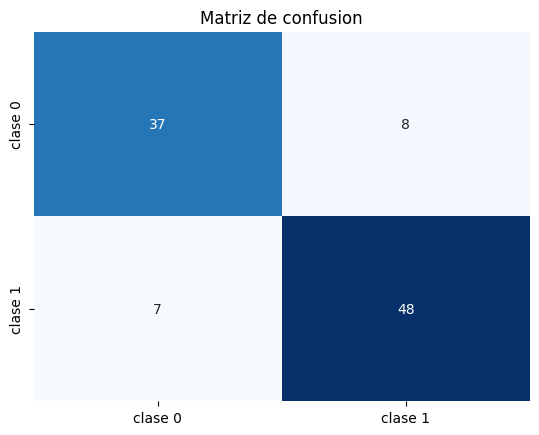

In [ ]:
Y_heatConfu(matriz_confusion)

Analisis de la matriz de confusion

In [ ]:
Tn, Fp, Fn, Tp = matriz_confusion.ravel()
print("Verdaderos Negativos: ", Tn)
print("Falsos Positivos: ", Fp)
print("Falsos Negativos: ", Fn)
print("Verdaderos Positivos: ", Tp)

Verdaderos Negativos:  37
Falsos Positivos:  8
Falsos Negativos:  7
Verdaderos Positivos:  48


In [ ]:
Error = (Fp+Fn)/(Tn+Fp+Fn+Tp)*100 #Suma de los falsos/ total de datos de test
print("Error: ", Error)


Error:  15.0
